<a href="https://colab.research.google.com/github/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, zipfile
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

! wget -q -O Bank_Account_or_Service_Complaints.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/Bank_Account_or_Service_Complaints.zip
zip_ref = zipfile.ZipFile('Bank_Account_or_Service_Complaints.zip', 'r'); zip_ref.extractall(); zip_ref.close()
review = pd.read_csv('Bank_Account_or_Service_Complaints.csv')

In [3]:
review.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
1,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
2,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,TX,75025,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468981
4,07/29/2013,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,CA,96088,NaN,NaN,Web,08/01/2013,Closed with explanation,Yes,No,469185


In [4]:
review["Sub-product"].unique()

array(['Checking account', 'Other bank product/service',
       '(CD) Certificate of deposit', 'Savings account',
       'Cashing a check without an account'], dtype=object)

In [5]:
review.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [6]:
cust_rev = review[['Date received', 'Sub-product', 'Issue','Consumer complaint narrative', 'Company public response', 'Company',
       'State']]

In [7]:
! wget -q -O usa.zip https://github.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/raw/refs/heads/main/Data/National_Obesity_By_State-shp.zip
zip_ref = zipfile.ZipFile('usa.zip', 'r'); zip_ref.extractall(); zip_ref.close()
usa_shp = gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

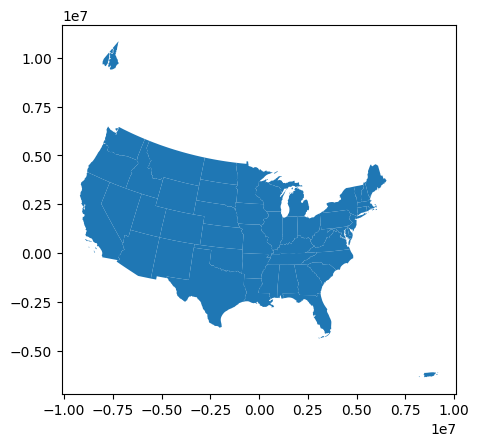

In [8]:
usa_shp.plot()

In [9]:
! wget -q -O data_camp.csv https://raw.githubusercontent.com/HarshGujarathi7/Data-Science-in-Finance--Independent-Study/refs/heads/main/Data/Datacamp_data.csv


In [10]:
dc_data = pd.read_csv('data_camp.csv')

In [11]:
dc_data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [12]:
dc_data.isna().sum()

,0
trans_date_trans_time,0
merchant,0
category,0
amt,0
city,0
state,0
lat,0
long,0
city_pop,0
job,0


In [13]:
dc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  1333 non-null   object 
 1   merchant               1333 non-null   object 
 2   category               1333 non-null   object 
 3   amt                    1333 non-null   float64
 4   city                   1333 non-null   object 
 5   state                  1333 non-null   object 
 6   lat                    1333 non-null   float64
 7   long                   1333 non-null   float64
 8   city_pop               1333 non-null   int64  
 9   job                    1333 non-null   object 
 10  dob                    1333 non-null   object 
 11  trans_num              1333 non-null   object 
 12  merch_lat              1333 non-null   float64
 13  merch_long             1333 non-null   float64
 14  is_fraud               1333 non-null   int64  
dtypes: f

In [14]:
dc_data.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,1333.000000,1333.000000,1333.000000,1.333000e+03,1333.000000,1333.000000,1333.000000
mean,69.162273,39.869987,-111.438044,9.601609e+04,39.861073,-111.438674,0.006002
std,125.879021,5.694163,13.698908,2.625325e+05,5.725748,13.712197,0.077266
min,1.050000,20.027100,-165.672300,4.600000e+01,19.165823,-166.288628,0.000000
25%,9.860000,36.715400,-120.664900,4.670000e+02,36.878200,-120.493701,0.000000
50%,49.740000,39.741700,-111.794100,1.517000e+03,39.636295,-111.367562,0.000000
75%,84.430000,42.277000,-101.136000,3.488200e+04,42.374139,-101.445631,0.000000
max,3178.510000,65.689900,-89.628700,1.312922e+06,66.645176,-89.015733,1.000000


In [15]:
dc_data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [16]:
dc_data.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [17]:
dc_data.shape

(1333, 15)

In [23]:
len(dc_data["category"].unique())


14

In [27]:
for i in dc_data.columns:
  print(i, len(dc_data[i].unique()))

trans_date_trans_time 1327
merchant 566
category 14
amt 1254
city 159
state 13
lat 162
long 162
city_pop 156
job 146
dob 165
trans_num 1333
merch_lat 1332
merch_long 1333
is_fraud 2


In [30]:
# dc_data["city_pop"].unique()

In [31]:
dc_data.drop(columns=['trans_date_trans_time','lat','long','city_pop','dob','trans_num','merch_lat','merch_long'], inplace=True)


In [32]:
dc_data.columns

Index(['merchant', 'category', 'amt', 'city', 'state', 'job', 'is_fraud'], dtype='object')

In [33]:
dc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   merchant  1333 non-null   object 
 1   category  1333 non-null   object 
 2   amt       1333 non-null   float64
 3   city      1333 non-null   object 
 4   state     1333 non-null   object 
 5   job       1333 non-null   object 
 6   is_fraud  1333 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 73.0+ KB


In [39]:
# dc_data['merchant'].value_counts()
dc_data['category'].value_counts()
# dc_data['city'].value_counts()


,count
category,
gas_transport,168
grocery_pos,145
home,128
shopping_pos,114
kids_pets,109
shopping_net,105
personal_care,99
health_fitness,85
misc_pos,83


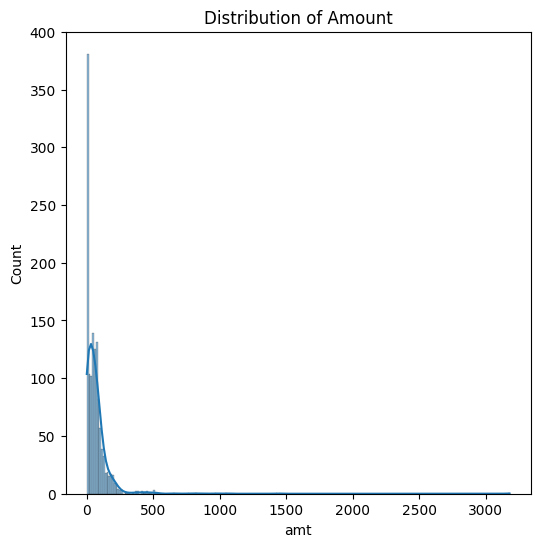

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of amount (amt)
plt.figure(figsize=(6, 6))
sns.histplot(dc_data['amt'], kde=True)
plt.title('Distribution of Amount')
plt.show()


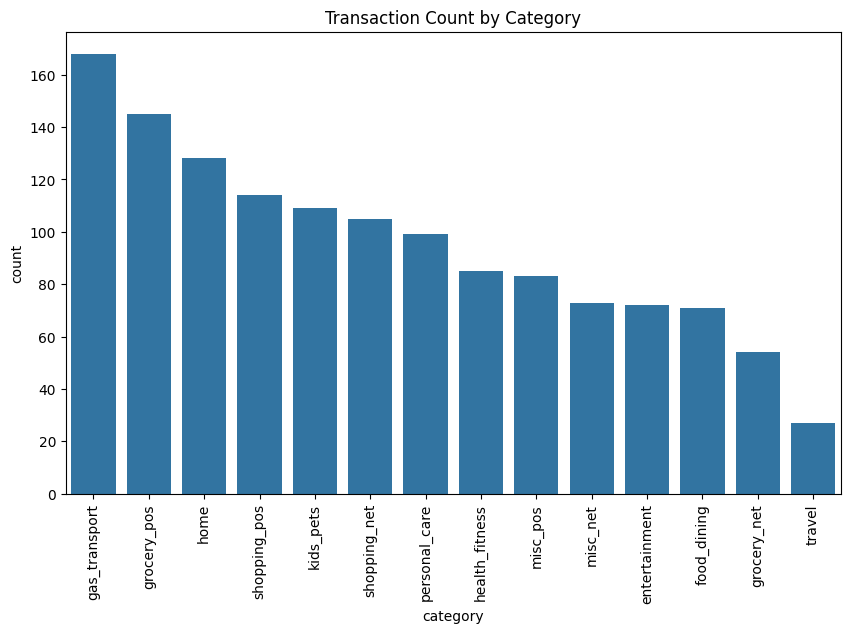

In [46]:
# Category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=dc_data, order=dc_data['category'].value_counts().index)
plt.title('Transaction Count by Category')
plt.xticks(rotation=90)
plt.show()


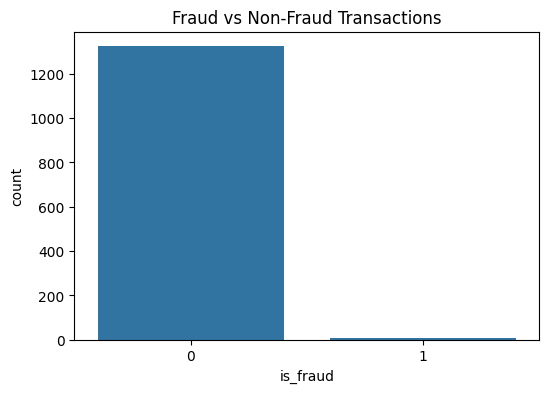

In [48]:
# Fraud vs Non-fraud transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=dc_data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()


In [49]:
# WORST DATA EVER!
dc_data['is_fraud'].value_counts()

,count
is_fraud,
0,1325
1,8
